# Variaciones en la escala del sistema

Es importante preguntarnos si cambiar la escala de un sistema altera de alguna manera la evolución del sistema. Al igual que en el análisis en la variación de condiciones de frontera, consideraremos una serie de ejemplos para visualizar si existe o no, una variación en la evolución de la enfermedad.

En cada uno de los siguientes ejemplos se realizaron 4 cambios de escala sobre el tipo de sistema en cuestión, posteriormente se aplicaron las implementaciones de los modelos $SIS$ y $SIR$ tomando como punto de partida una enfermedad con parámetros $\alpha=0.2$ y $\beta=0.5$, una población infectada inicial del $10\%$ con una ubicación inicial del tipo aleatoria.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from EpidemiologicalModels.DefineSpaceInCA import *
from EpidemiologicalModels.epidemiologicalModels import *

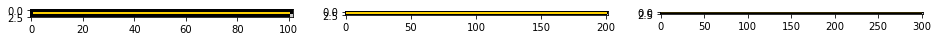

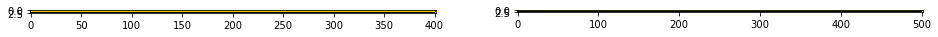

In [2]:
scaledSystem1 = np.zeros((1,100))  # np.zeros((1,100)); np.zeros((10, 10)); np.zeros((5,20)); rombo(1,20,5,0,-np.ones((11,20))); triangulo(1,19,9,0,-np.ones((10,19)))
scaledSystem2 = np.zeros((1,200))  # np.zeros((1,200)); np.zeros((25, 25)); np.zeros((13,52)); rombo(1,50,16,0,-np.ones((32,50))); triangulo(1,49,24,0,-np.ones((25,49)))
scaledSystem3 = np.zeros((1,300))  # np.zeros((1,300)); np.zeros((50, 50)); np.zeros((25,100)); rombo(1,100,30,1,-np.ones((60,100))); triangulo(1,99,49,0,-np.ones((50,99)))
scaledSystem4 = np.zeros((1,400))  # np.zeros((1,400)); np.zeros((75, 75)); np.zeros((38,152)); rombo(1,150,40,0,-np.ones((80,150))); triangulo(1,149,74,0,-np.ones((75,149)))
scaledSystem5 = np.zeros((1,500))  # np.zeros((1,500)); np.zeros((100, 100)); np.zeros((50,200)); rombo(1,200,55,0,-np.ones((110,200))); triangulo(1,199,99,0,-np.ones((100,199)))

figsize(16,20)

plt.subplot(1,3,1)
plt.imshow(color(scaledSystem1),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
plt.imshow(color(scaledSystem2),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,3)
plt.imshow(color(scaledSystem3),cmap="nipy_spectral", interpolation='nearest')

plt.show()

plt.subplot(1,2,1)
plt.imshow(color(scaledSystem4),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,2,2)
plt.imshow(color(scaledSystem5),cmap="nipy_spectral", interpolation='nearest')

plt.show()

### Modelos SIS y SIR simples

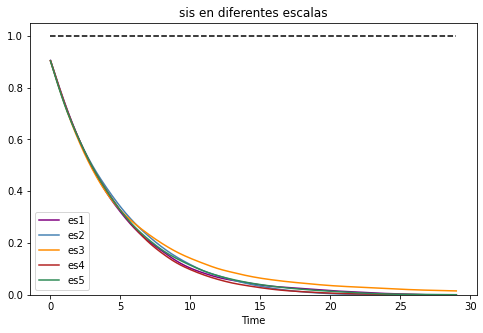

In [3]:
a = 0.2; b = 0.5
model = "sis"
state = 0 # S=0; I=1; R=2; M=3

col_esc = ["purple", "steelblue", "darkorange", "firebrick", "seagreen"]
eti_esc = ["es1", "es2", "es3", "es4", "es5"]

modelOnScale1 = models(model,a,b,scaledSystem1,Moore).mediumCurves(0.1,30,10)
modelOnScale2 = models(model,a,b,scaledSystem2,Moore).mediumCurves(0.1,30,10)
modelOnScale3 = models(model,a,b,scaledSystem3,Moore).mediumCurves(0.1,30,10)
modelOnScale4 = models(model,a,b,scaledSystem4,Moore).mediumCurves(0.1,30,10)
modelOnScale5 = models(model,a,b,scaledSystem5,Moore).mediumCurves(0.1,30,10)

var = [modelOnScale1[0][state],modelOnScale2[0][state],modelOnScale3[0][state],
       modelOnScale4[0][state],modelOnScale5[0][state]]

figsize(8,5)

graficas(var,eti_esc,col_esc,f"{model} en diferentes escalas")

Si graficamos las diferencias presentes entre cada escala y la escala mayor (es este caso la escala de 500 individuos) obtenemos:

In [4]:
from EpidemiologicalModels.tools import *

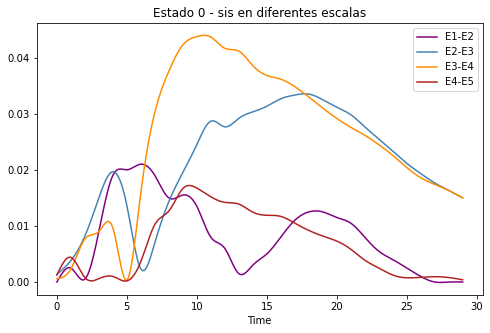

In [5]:
col_dif = ["purple", "steelblue", "darkorange", "firebrick"]
eti_dif = ["E1-E2", "E2-E3", "E3-E4", "E4-E5"]

var_difs = [variationsBetweenScales(modelOnScale1[1][state], modelOnScale2[1][state]),
            variationsBetweenScales(modelOnScale2[1][state], modelOnScale3[1][state]),
            variationsBetweenScales(modelOnScale3[1][state], modelOnScale4[1][state]),
            variationsBetweenScales(modelOnScale4[1][state], modelOnScale5[1][state])]

graficas(var_difs,eti_dif,col_dif,f"Estado {state} - {model} en diferentes escalas", limit=False)

### Modelos con natalidad y mortalidad

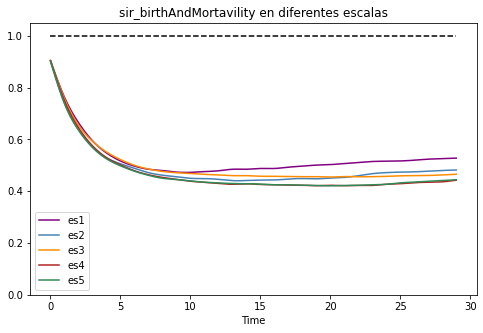

In [6]:
a=0.2; b=0.5
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
br = 2

model = "sir_birthAndMortavility"
state = 0 # S=0; I=1; R=2; M=3

col_esc = ["purple", "steelblue", "darkorange", "firebrick", "seagreen"]
eti_esc = ["es1", "es2", "es3", "es4", "es5"]

ages_sys1 = agesMatrix(ranges,scaledSystem1)
ages_sys2 = agesMatrix(ranges,scaledSystem2)
ages_sys3 = agesMatrix(ranges,scaledSystem3)
ages_sys4 = agesMatrix(ranges,scaledSystem4)
ages_sys5 = agesMatrix(ranges,scaledSystem5)

modelOnScale1 = models(model,a,b,scaledSystem1,Moore)
modelOnScale1.birthRate = br; modelOnScale1.probabilityOfDyingByAgeGroup = mr
modelOnScale1.systemAges = ages_sys1; modelOnScale1.annualUnit = 365
scale1 = modelOnScale1.mediumCurves(0.1,30,10)

modelOnScale2 = models(model,a,b,scaledSystem2,Moore)
modelOnScale2.birthRate = br; modelOnScale2.probabilityOfDyingByAgeGroup = mr
modelOnScale2.systemAges = ages_sys2; modelOnScale2.annualUnit = 365
scale2 = modelOnScale2.mediumCurves(0.1,30,10)

modelOnScale3 = models(model,a,b,scaledSystem3,Moore)
modelOnScale3.birthRate = br; modelOnScale3.probabilityOfDyingByAgeGroup = mr
modelOnScale3.systemAges = ages_sys3; modelOnScale3.annualUnit = 365
scale3 = modelOnScale3.mediumCurves(0.1,30,10)

modelOnScale4 = models(model,a,b,scaledSystem4,Moore)
modelOnScale4.birthRate = br; modelOnScale4.probabilityOfDyingByAgeGroup = mr
modelOnScale4.systemAges = ages_sys4; modelOnScale4.annualUnit = 365
scale4 = modelOnScale4.mediumCurves(0.1,30,10)

modelOnScale5 = models(model,a,b,scaledSystem5,Moore)
modelOnScale5.birthRate = br; modelOnScale5.probabilityOfDyingByAgeGroup = mr
modelOnScale5.systemAges = ages_sys5; modelOnScale5.annualUnit = 365
scale5 = modelOnScale5.mediumCurves(0.1,30,10)

var = [scale1[0][state],scale2[0][state],scale3[0][state],scale4[0][state],scale5[0][state]]

figsize(8,5)

graficas(var,eti_esc,col_esc,f"{model} en diferentes escalas")

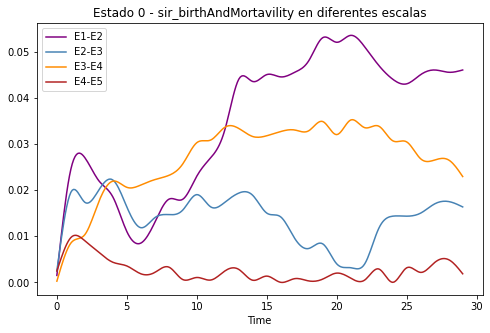

In [7]:
col_dif = ["purple", "steelblue", "darkorange", "firebrick"]
eti_dif = ["E1-E2", "E2-E3", "E3-E4", "E4-E5"]

var_difs = [variationsBetweenScales(scale1[1][state], scale2[1][state]),
            variationsBetweenScales(scale2[1][state], scale3[1][state]),
            variationsBetweenScales(scale3[1][state], scale4[1][state]),
            variationsBetweenScales(scale4[1][state], scale5[1][state])]

graficas(var_difs,eti_dif,col_dif,f"Estado {state} - {model} en diferentes escalas", limit=False)

### Modelos con muerte por enfermedad

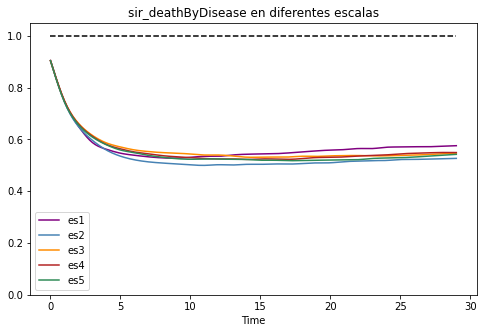

In [8]:
a=0.2; b=0.5
ranges = [[1,25,0.4],[25,64,0.4],[65,90,0.2]]
mr = [[1,14,0.0005],[15,69,0.02],[70,100,0.15]]
ranges_dead = [[1,20,0.08],[21,45,0.15],[46,78,0.35],[79,100,0.8]]
br = 2

model = "sir_deathByDisease"
state = 0 # S=0; I=1; R=2; M=3

col_esc = ["purple", "steelblue", "darkorange", "firebrick", "seagreen"]
eti_esc = ["es1", "es2", "es3", "es4", "es5"]

ages_sys1 = agesMatrix(ranges,scaledSystem1)
ages_sys2 = agesMatrix(ranges,scaledSystem2)
ages_sys3 = agesMatrix(ranges,scaledSystem3)
ages_sys4 = agesMatrix(ranges,scaledSystem4)
ages_sys5 = agesMatrix(ranges,scaledSystem5)

modelOnScale1 = models(model,a,b,scaledSystem1,Moore)
modelOnScale1.birthRate = br; modelOnScale1.probabilityOfDyingByAgeGroup = mr
modelOnScale1.systemAges = ages_sys1; modelOnScale1.annualUnit = 365
modelOnScale1.deathFromDiseaseByAgeRange = ranges_dead
scale1 = modelOnScale1.mediumCurves(0.1,30,10)

modelOnScale2 = models(model,a,b,scaledSystem2,Moore)
modelOnScale2.birthRate = br; modelOnScale2.probabilityOfDyingByAgeGroup = mr
modelOnScale2.systemAges = ages_sys2; modelOnScale2.annualUnit = 365
modelOnScale2.deathFromDiseaseByAgeRange = ranges_dead
scale2 = modelOnScale2.mediumCurves(0.1,30,10)

modelOnScale3 = models(model,a,b,scaledSystem3,Moore)
modelOnScale3.birthRate = br; modelOnScale3.probabilityOfDyingByAgeGroup = mr
modelOnScale3.systemAges = ages_sys3; modelOnScale3.annualUnit = 365
modelOnScale3.deathFromDiseaseByAgeRange = ranges_dead
scale3 = modelOnScale3.mediumCurves(0.1,30,10)

modelOnScale4 = models(model,a,b,scaledSystem4,Moore)
modelOnScale4.birthRate = br; modelOnScale4.probabilityOfDyingByAgeGroup = mr
modelOnScale4.systemAges = ages_sys4; modelOnScale4.annualUnit = 365
modelOnScale4.deathFromDiseaseByAgeRange = ranges_dead
scale4 = modelOnScale4.mediumCurves(0.1,30,10)

modelOnScale5 = models(model,a,b,scaledSystem5,Moore)
modelOnScale5.birthRate = br; modelOnScale5.probabilityOfDyingByAgeGroup = mr
modelOnScale5.systemAges = ages_sys5; modelOnScale5.annualUnit = 365
modelOnScale5.deathFromDiseaseByAgeRange = ranges_dead
scale5 = modelOnScale5.mediumCurves(0.1,30,10)

var = [scale1[0][state],scale2[0][state],scale3[0][state],scale4[0][state],scale5[0][state]]

figsize(8,5)

graficas(var,eti_esc,col_esc,f"{model} en diferentes escalas")

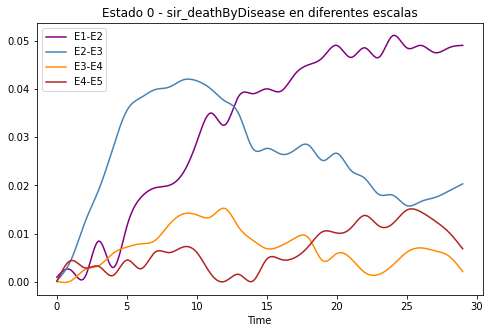

In [9]:
col_dif = ["purple", "steelblue", "darkorange", "firebrick"]
eti_dif = ["E1-E2", "E2-E3", "E3-E4", "E4-E5"]

var_difs = [variationsBetweenScales(scale1[1][state], scale2[1][state]),
            variationsBetweenScales(scale2[1][state], scale3[1][state]),
            variationsBetweenScales(scale3[1][state], scale4[1][state]),
            variationsBetweenScales(scale4[1][state], scale5[1][state])]

graficas(var_difs,eti_dif,col_dif,f"Estado {state} - {model} en diferentes escalas", limit=False)